In [1]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [2]:
from math import log

import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_blobs
from tqdm import tqdm

from mixture.k_means import KMeans

In [3]:
import os

os.getcwd()

'/home/zarizky/projects/neural-autoregressive-object-co-occurrence'

In [4]:
k = 8
X, y_true = make_blobs(n_samples=10000, centers=k, cluster_std=0.60, random_state=0)
X = torch.from_numpy(X.copy())

dataloader = torch.utils.data.DataLoader(X, 1000, True)

In [21]:
torch.manual_seed(0)
k = 8
kmeans = KMeans(k, "k-means++")
kmeans.fit(X)

KMeans()

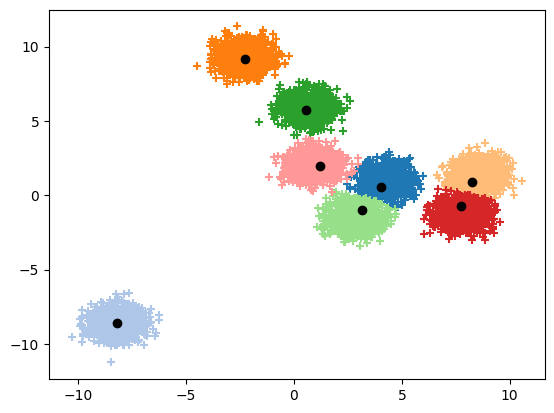

In [22]:
colors = plt.cm.tab20.colors

argmax = kmeans(X).argmax(-1)
for i in range(kmeans.num_clusters):
    X_i = X[argmax == i]
    plt.scatter(X_i[:, -1], X_i[:, 0], color=colors[i % len(colors)], marker="+")
plt.scatter(kmeans.clusters[:, -1], kmeans.clusters[:, 0], color="black")
plt.show()